In [2]:
!pip uninstall basicpy -y
!pip install -e ../

Found existing installation: BaSiCPy 0.2.1.dev0
Uninstalling BaSiCPy-0.2.1.dev0:
  Successfully uninstalled BaSiCPy-0.2.1.dev0
Obtaining file:///Users/fukai/projects/BaSiCpy
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Running setup.py develop for BaSiCPy
You should consider upgrading via the '/Users/fukai/.pyenv/versions/3.10.4/envs/basicpy/bin/python3.10 -m pip install --upgrade pip' command.


In [84]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 27.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 KB 9.5 MB/s eta 0:00:0000:01
You should consider upgrading via the '/Users/fukai/.pyenv/versions/3.10.4/envs/basicpy/bin/python3.10 -m pip install --upgrade pip' command.


In [85]:
from basicpy import BaSiC
from basicpy import datasets as bdata
import numpy as np
from basicpy.tools.dct_tools import JaxDCT
from matplotlib import pyplot as plt
import pandas as pd

In [35]:
data = bdata.wsi_brain()

In [92]:
basic_approximates = [
    BaSiC(
        fitting_mode="approximate",
        working_size=None,
        get_darkfield=d,
        max_reweight_iterations=1,
    )
    for d in [False, True]
]

basic_ladmaps = [
    BaSiC(
        fitting_mode="ladmap",
        working_size=None,
        get_darkfield=d,
        lambda_flatfield_coef=100 / 80000,
        lambda_darkfield_coef=0.2,
        lambda_darkfield_sparse_coef=0.2,
        max_reweight_iterations=1,
    )
    for d in [False, True]
]

result_df = []
for data_key in bdata.RESCALED_TEST_DATA_PROPS.keys():
    data = bdata.fetch(data_key)
    for b in basic_approximates + basic_ladmaps:
        b.fit(data)
        res = (
            data
            - b.baseline[:, np.newaxis, np.newaxis] * b.flatfield[np.newaxis]
            - b.darkfield
        )
        assert np.allclose(res, b._residual, atol=100000, rtol=1e-2)
        print(
            [
                b._lambda_flatfield,
                b._lambda_darkfield,
                b._lambda_darkfield_sparse,
            ]
        )
        lagrangians = [
            np.sum(np.abs(res)),
            b._lambda_flatfield * np.sum(np.abs(JaxDCT.dct2d(b._S))),
            b._lambda_darkfield * np.sum(np.abs(JaxDCT.dct2d(b._D_R))),
            b._lambda_darkfield_sparse * np.sum(np.abs(b._D_R)),
        ]
        print(lagrangians)
        print(sum(lagrangians) / 1e9)
        result_df.append(
            {
                "data_key": data_key,
                "lagrangian_value": np.sum(lagrangians),
                "fitting_mode": b.fitting_mode,
                "get_darkfield": b.get_darkfield,
                "lambda_flatfield": b._lambda_flatfield,
                "lambda_darkfield": b._lambda_darkfield,
                "lambda_darkfield_sparse": b._lambda_darkfield_sparse,
            }
        )
result_df = pd.DataFrame.from_records(result_df)

INFO:basicpy.basicpy:Initializing BaSiC 11822345856 with parameters: 
fitting_mode: approximate
working_size: None
get_darkfield: False
max_reweight_iterations: 1

INFO:basicpy.basicpy:Initializing BaSiC 11822348256 with parameters: 
fitting_mode: approximate
working_size: None
get_darkfield: True
max_reweight_iterations: 1

INFO:basicpy.basicpy:Initializing BaSiC 11633866720 with parameters: 
fitting_mode: ladmap
working_size: None
get_darkfield: False
lambda_flatfield_coef: 0.00125
lambda_darkfield_coef: 0.2
lambda_darkfield_sparse_coef: 0.2
max_reweight_iterations: 1

INFO:basicpy.basicpy:Initializing BaSiC 11822349216 with parameters: 
fitting_mode: ladmap
working_size: None
get_darkfield: True
lambda_flatfield_coef: 0.00125
lambda_darkfield_coef: 0.2
lambda_darkfield_sparse_coef: 0.2
max_reweight_iterations: 1

INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 9.388494390805135e-07.
INFO

[DeviceArray(0.88837737, dtype=float32), DeviceArray(0.17767547, dtype=float32), DeviceArray(0.17767547, dtype=float32)]
[1097715000.0, DeviceArray(137871.5, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
1.0978528


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 6.144786652839684e-07.
INFO:basicpy.basicpy:mean of S: 1071.8890380859375.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 0.6472649579991412 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[DeviceArray(0.88837737, dtype=float32), DeviceArray(0.17767547, dtype=float32), DeviceArray(0.17767547, dtype=float32)]
[1114304500.0, DeviceArray(140707.8, dtype=float32), DeviceArray(1573.7855, dtype=float32), DeviceArray(17282.393, dtype=float32)]
1.114464


INFO:basicpy.basicpy:single-step optimization score: 6.781623369533918e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 0.4205319590000727 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[DeviceArray(0.8883773, dtype=float32), DeviceArray(0.17767547, dtype=float32), DeviceArray(0.17767547, dtype=float32)]
[1092929300.0, DeviceArray(367.7328, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
1.0929297


INFO:basicpy.basicpy:single-step optimization score: 7.224989531096071e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 0.5447777500012307 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.8883773, dtype=float32), DeviceArray(0.17767547, dtype=float32), DeviceArray(0.17767547, dtype=float32)]
[1069233150.0, DeviceArray(1228.6162, dtype=float32), DeviceArray(158522.72, dtype=float32), DeviceArray(614205.7, dtype=float32)]
1.0700071


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 6.580406193279487e-07.
INFO:basicpy.basicpy:mean of S: 178.64749145507812.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 1.9893961249981658 seconds ===


[DeviceArray(0.5591964, dtype=float32), DeviceArray(0.11183928, dtype=float32), DeviceArray(0.11183928, dtype=float32)]


INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[5935496.0, DeviceArray(31583.922, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.00596708


INFO:basicpy.basicpy:single-step optimization score: 9.123245945374947e-07.
INFO:basicpy.basicpy:mean of S: 178.63385009765625.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 1.9565203339989239 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[DeviceArray(0.5591964, dtype=float32), DeviceArray(0.11183928, dtype=float32), DeviceArray(0.11183928, dtype=float32)]
[5875723.5, DeviceArray(30482.645, dtype=float32), DeviceArray(1104.7128, dtype=float32), DeviceArray(3344.0251, dtype=float32)]
0.0059106546


INFO:basicpy.basicpy:single-step optimization score: 8.507836923854484e-07.
INFO:basicpy.basicpy:mean of S: 1.0000001192092896.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 1.2191172909988381 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[DeviceArray(0.5591964, dtype=float32), DeviceArray(0.11183929, dtype=float32), DeviceArray(0.11183929, dtype=float32)]
[5682540.0, DeviceArray(236.56126, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.0056827767


INFO:basicpy.basicpy:single-step optimization score: 6.924910849193111e-07.
INFO:basicpy.basicpy:mean of S: 1.000000238418579.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 1.6528765830007615 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.5591964, dtype=float32), DeviceArray(0.11183929, dtype=float32), DeviceArray(0.11183929, dtype=float32)]
[5683148.5, DeviceArray(241.17892, dtype=float32), DeviceArray(1488.1428, dtype=float32), DeviceArray(1265.7284, dtype=float32)]
0.005686143


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 8.630402135167969e-07.
INFO:basicpy.basicpy:mean of S: 52.19914627075195.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 2.1149825419997796 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.68333274, dtype=float32), DeviceArray(0.13666655, dtype=float32), DeviceArray(0.13666654, dtype=float32)]
[10502139.0, DeviceArray(8912.243, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.010511051


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 6.546499093929015e-07.
INFO:basicpy.basicpy:mean of S: 52.4122314453125.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 2.6318746249999094 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.68333274, dtype=float32), DeviceArray(0.13666655, dtype=float32), DeviceArray(0.13666654, dtype=float32)]
[7854741.5, DeviceArray(8076.113, dtype=float32), DeviceArray(1022.9055, dtype=float32), DeviceArray(9133.153, dtype=float32)]
0.007872974


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 6.27749614068307e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 1.6414584170015587 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.68333274, dtype=float32), DeviceArray(0.13666655, dtype=float32), DeviceArray(0.13666655, dtype=float32)]
[10028211.0, DeviceArray(332.27722, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.010028543


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 7.508190833505068e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 2.1344744580019324 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.68333274, dtype=float32), DeviceArray(0.13666655, dtype=float32), DeviceArray(0.13666655, dtype=float32)]
[6954299.5, DeviceArray(623.07355, dtype=float32), DeviceArray(5349.1445, dtype=float32), DeviceArray(17055.646, dtype=float32)]
0.006977327


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 8.241901809924457e-07.
INFO:basicpy.basicpy:mean of S: 87.55728912353516.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 2.1858276250022755 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.580258, dtype=float32), DeviceArray(0.1160516, dtype=float32), DeviceArray(0.1160516, dtype=float32)]
[37655468.0, DeviceArray(16078.783, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.037671547


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 8.889134051059955e-07.
INFO:basicpy.basicpy:mean of S: 87.4671859741211.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 2.696189249996678 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.580258, dtype=float32), DeviceArray(0.1160516, dtype=float32), DeviceArray(0.1160516, dtype=float32)]
[35568796.0, DeviceArray(14966.719, dtype=float32), DeviceArray(626.95123, dtype=float32), DeviceArray(18257.42, dtype=float32)]
0.035602648


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 6.676244765912998e-07.
INFO:basicpy.basicpy:mean of S: 1.000000238418579.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 1.6325329170031182 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===


[DeviceArray(0.580258, dtype=float32), DeviceArray(0.11605161, dtype=float32), DeviceArray(0.11605161, dtype=float32)]
[34491276.0, DeviceArray(287.81433, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.034491565


INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 7.562906034763728e-07.
INFO:basicpy.basicpy:mean of S: 1.000000238418579.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 2.159746041001199 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[DeviceArray(0.580258, dtype=float32), DeviceArray(0.11605161, dtype=float32), DeviceArray(0.11605161, dtype=float32)]
[33866320.0, DeviceArray(291.8008, dtype=float32), DeviceArray(947.2467, dtype=float32), DeviceArray(12876.39, dtype=float32)]
0.033880435


INFO:basicpy.basicpy:single-step optimization score: 8.970346243586391e-07.
INFO:basicpy.basicpy:mean of S: 2725.49169921875.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 0.21192825000252924 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[DeviceArray(0.4547477, dtype=float32), DeviceArray(0.09094954, dtype=float32), DeviceArray(0.09094954, dtype=float32)]
[717007940.0, DeviceArray(234392.73, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.7172423


INFO:basicpy.basicpy:single-step optimization score: 5.741670179304492e-07.
INFO:basicpy.basicpy:mean of S: 2711.4912109375.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 0.2768333749991143 seconds ===
INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 6.892511805745016e-07.
INFO:basicpy.basicpy:mean of S: 0.9999999403953552.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 0.16380287499850965 seconds ===


[DeviceArray(0.4547477, dtype=float32), DeviceArray(0.09094954, dtype=float32), DeviceArray(0.09094954, dtype=float32)]
[549272770.0, DeviceArray(263714.6, dtype=float32), DeviceArray(10036.224, dtype=float32), DeviceArray(256731.38, dtype=float32)]
0.54980326


INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


[DeviceArray(0.45474768, dtype=float32), DeviceArray(0.09094954, dtype=float32), DeviceArray(0.09094954, dtype=float32)]
[609824450.0, DeviceArray(151.42665, dtype=float32), DeviceArray(0., dtype=float32), DeviceArray(0., dtype=float32)]
0.6098246


INFO:basicpy.basicpy:single-step optimization score: 8.753951874496124e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:=== BaSiC fit finished in 0.23129487500045798 seconds ===


[DeviceArray(0.45474768, dtype=float32), DeviceArray(0.09094954, dtype=float32), DeviceArray(0.09094954, dtype=float32)]
[532090000.0, DeviceArray(175.75551, dtype=float32), DeviceArray(25433.256, dtype=float32), DeviceArray(293652.53, dtype=float32)]
0.53240925


In [111]:
result_df["label"] = (
    result_df["fitting_mode"]
    + " "
    + result_df["get_darkfield"].apply(lambda x: "with " if x else "without ")
    + "darkfield "
)
result_df = result_df.sort_values(["data_key", "get_darkfield"])
result_df

,data_key,lagrangian_value,fitting_mode,get_darkfield,lambda_flatfield,lambda_darkfield,lambda_darkfield_sparse,label
0,cell_culture,1.097853e+09,FittingMode.approximate,False,0.88837737,0.17767547,0.17767547,approximate without darkfield
2,cell_culture,1.092930e+09,FittingMode.ladmap,False,0.8883773,0.17767547,0.17767547,ladmap without darkfield
1,cell_culture,1.114464e+09,FittingMode.approximate,True,0.88837737,0.17767547,0.17767547,approximate with darkfield
3,cell_culture,1.070007e+09,FittingMode.ladmap,True,0.8883773,0.17767547,0.17767547,ladmap with darkfield
4,timelapse_brightfield,5.967080e+06,FittingMode.approximate,False,0.5591964,0.11183928,0.11183928,approximate without darkfield
6,timelapse_brightfield,5.682776e+06,FittingMode.ladmap,False,0.5591964,0.11183929,0.11183929,ladmap without darkfield
5,timelapse_brightfield,5.910654e+06,FittingMode.approximate,True,0.5591964,0.11183928,0.11183928,approximate with darkfield
7,timelapse_brightfield,5.686143e+06,FittingMode.ladmap,True,0.5591964,0.11183929,0.11183929,ladmap with darkfield
8,timelapse_nanog,1.051105e+07,FittingMode.approximate,False,0.68333274,0.13666655,0.13666654,approximate without darkfield
10,timelapse_nanog,1.002854e+07,FittingMode.ladmap,False,0.68333274,0.13666655,0.13666655,ladmap without darkfield


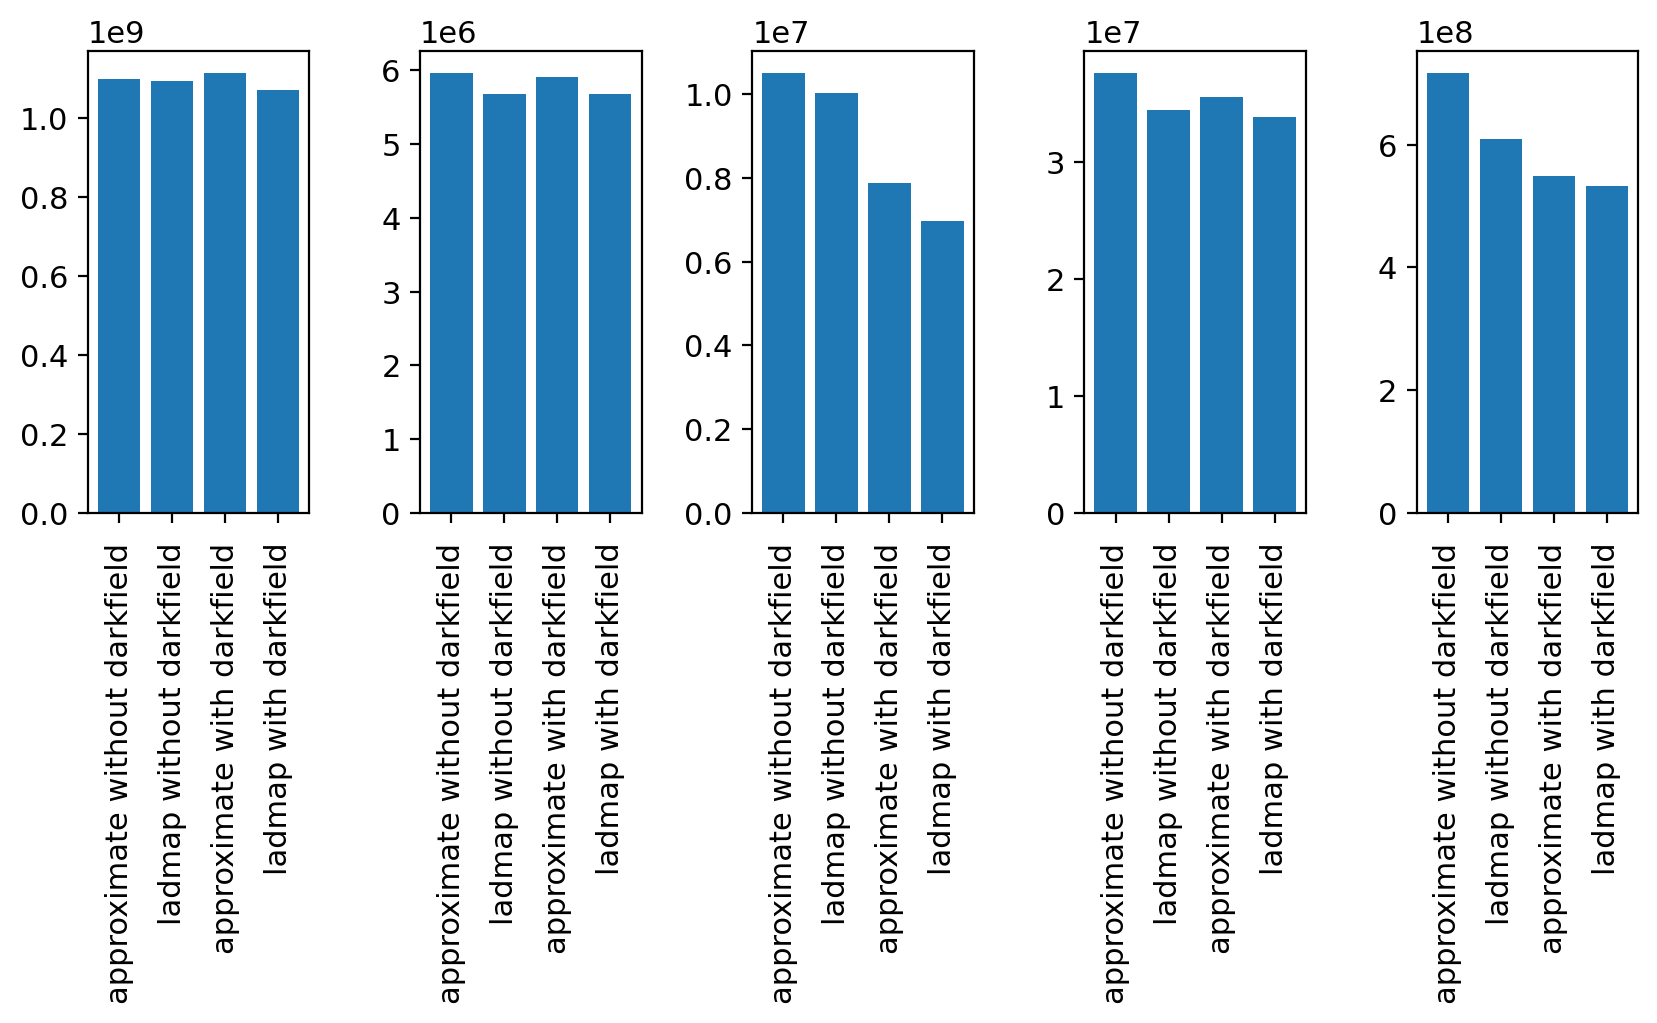

In [112]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3), gridspec_kw=dict(wspace=0.5))
for ax, (image_key, grp) in zip(axes, result_df.groupby("data_key")):
    ax.bar(
        grp["label"],
        grp["lagrangian_value"],
    )
    ax.xaxis.set_tick_params(rotation=90)

In [117]:
summarized_df = []
for (image_key, get_darkfield), grp in result_df.groupby(["data_key", "get_darkfield"]):
    row_a = grp[grp["fitting_mode"] == "approximate"]
    row_l = grp[grp["fitting_mode"] == "ladmap"]
    summarized_df.append(
        {
            "data_key": image_key,
            "get_darkfield": get_darkfield,
            "ratio": row_l["lagrangian_value"].values[0]
            / row_a["lagrangian_value"].values[0],
        }
    )
summarized_df = pd.DataFrame.from_records(summarized_df)

In [124]:
summarized_df

,data_key,get_darkfield,ratio
0,cell_culture,False,0.995516
1,cell_culture,True,0.960109
2,timelapse_brightfield,False,0.952355
3,timelapse_brightfield,True,0.962016
4,timelapse_nanog,False,0.954095
5,timelapse_nanog,True,0.886238
6,timelapse_pu1,False,0.915587
7,timelapse_pu1,True,0.951627
8,wsi_brain,False,0.850235
9,wsi_brain,True,0.968363


In [137]:
grp

,data_key,get_darkfield,ratio
1,cell_culture,True,0.960109
3,timelapse_brightfield,True,0.962016
5,timelapse_nanog,True,0.886238
7,timelapse_pu1,True,0.951627
9,wsi_brain,True,0.968363


Text(0.5, 0, 'dataset')

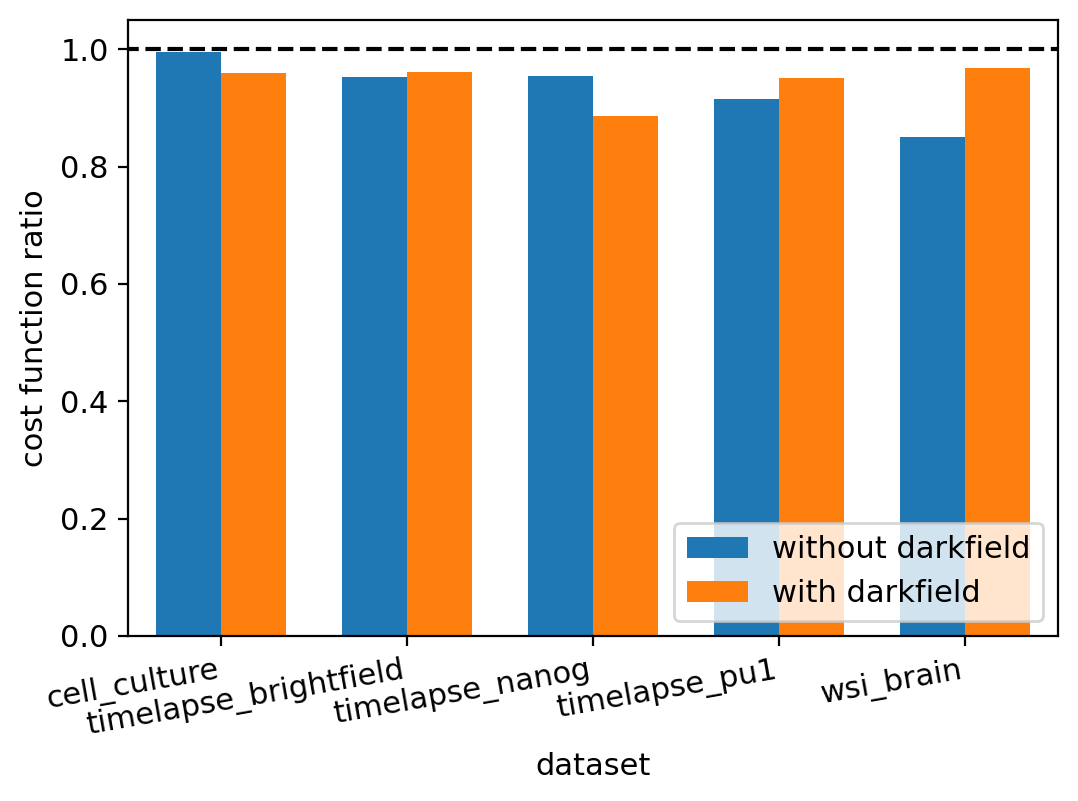

In [145]:
width = 0.35
for get_darkfield, grp in summarized_df.groupby("get_darkfield"):
    xs = np.arange(len(grp)) + (width / 2 * (get_darkfield - 0.5) * 2)
    plt.bar(
        xs,
        grp["ratio"],
        width,
        label=("with " if get_darkfield else "without ") + "darkfield",
    )
    if get_darkfield:
        plt.xticks(np.arange(len(grp)), grp["data_key"], rotation=10, ha="right")
plt.hlines(1.0, -1, 5, ls="--", color="k")
plt.ylabel("cost function ratio")
plt.xlim(-0.5, 4.5)
plt.legend(loc="lower right")
plt.xlabel("dataset")